In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)

In [9]:
crimes = """
SELECT unique_key, case_number, date, primary_type, description, location_description, arrest, domestic, beat, year
FROM `bigquery-public-data.chicago_crime.crime`
WHERE primary_type IS NOT NULL;
"""
crimes_df = pd.read_gbq(crimes, project_id='stoked-reality-328205')

Downloading: 100%|██████████| 7455325/7455325 [10:58<00:00, 11325.57rows/s]


In [10]:
crimes_df.head()

,unique_key,case_number,date,primary_type,description,location_description,arrest,domestic,beat,year
0,10230378,HY416747,2015-06-18 11:20:00+00:00,CRIMINAL TRESPASS,TO VEHICLE,STREET,False,False,212,2015
1,10239492,HY427160,2015-09-16 11:00:00+00:00,OBSCENITY,SALE/DIST OBSCENE MAT TO MINOR,RESIDENCE,True,False,1612,2015
2,10252405,HY440240,2015-09-27 11:17:00+00:00,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,CHA APARTMENT,True,False,533,2015
3,11241284,JB166143,2014-10-10 12:00:00+00:00,DECEPTIVE PRACTICE,EMBEZZLEMENT,OTHER,False,False,812,2014
4,10272078,HY460276,2015-01-01 12:00:00+00:00,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1622,2015


In [72]:
crimes_df.shape

(7455325, 11)

In [73]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7455325 entries, 0 to 7455324
Data columns (total 11 columns):
unique_key              int64
case_number             object
date                    datetime64[ns, UTC]
primary_type            object
description             object
location_description    object
arrest                  bool
domestic                bool
beat                    int64
year                    int64
month                   int64
dtypes: bool(2), datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 526.1+ MB


In [11]:
crimes_df['month'] = crimes_df['date'].dt.month       

In [12]:
crimes_df.head()

,unique_key,case_number,date,primary_type,description,location_description,arrest,domestic,beat,year,month
0,10230378,HY416747,2015-06-18 11:20:00+00:00,CRIMINAL TRESPASS,TO VEHICLE,STREET,False,False,212,2015,6
1,10239492,HY427160,2015-09-16 11:00:00+00:00,OBSCENITY,SALE/DIST OBSCENE MAT TO MINOR,RESIDENCE,True,False,1612,2015,9
2,10252405,HY440240,2015-09-27 11:17:00+00:00,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,CHA APARTMENT,True,False,533,2015,9
3,11241284,JB166143,2014-10-10 12:00:00+00:00,DECEPTIVE PRACTICE,EMBEZZLEMENT,OTHER,False,False,812,2014,10
4,10272078,HY460276,2015-01-01 12:00:00+00:00,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1622,2015,1


In [13]:
crimes_df.dtypes

unique_key                            int64
case_number                          object
date                    datetime64[ns, UTC]
primary_type                         object
description                          object
location_description                 object
arrest                                 bool
domestic                               bool
beat                                  int64
year                                  int64
month                                 int64
dtype: object

In [59]:
max_date = crimes_df.date.max()
min_date = crimes_df.date.min()

print(max_date)
print(min_date)

2021-12-09 12:59:00+00:00
2001-01-01 01:00:00+00:00


In [17]:
#how many crimes lead to an arrest?
crimes_df.arrest.value_counts(dropna=False, normalize=True)

False    0.732444
True     0.267556
Name: arrest, dtype: float64

In [19]:
#types of crimes

crimes_df.groupby(['primary_type']).size()

primary_type
ARSON                                  12663
ASSAULT                               479171
BATTERY                              1367605
BURGLARY                              414121
CONCEALED CARRY LICENSE VIOLATION        840
CRIM SEXUAL ASSAULT                    27818
CRIMINAL DAMAGE                       850151
CRIMINAL SEXUAL ASSAULT                 4224
CRIMINAL TRESPASS                     208433
DECEPTIVE PRACTICE                    321039
DOMESTIC VIOLENCE                          1
GAMBLING                               14607
HOMICIDE                               11623
HUMAN TRAFFICKING                         82
INTERFERENCE WITH PUBLIC OFFICER       17795
INTIMIDATION                            4390
KIDNAPPING                              7066
LIQUOR LAW VIOLATION                   14629
MOTOR VEHICLE THEFT                   344327
NARCOTICS                             739952
NON - CRIMINAL                            38
NON-CRIMINAL                             1

In [81]:
crimes_df.groupby(['primary_type']).arrest.value_counts(normalize=True).reset_index(name='arrest_rate')

,primary_type,arrest,arrest_rate
0,ARSON,False,0.874437
1,ARSON,True,0.125563
2,ASSAULT,False,0.780865
3,ASSAULT,True,0.219135
4,BATTERY,False,0.777168
...,...,...,...
66,STALKING,True,0.148290
67,THEFT,False,0.884774
68,THEFT,True,0.115226
69,WEAPONS VIOLATION,True,0.757288


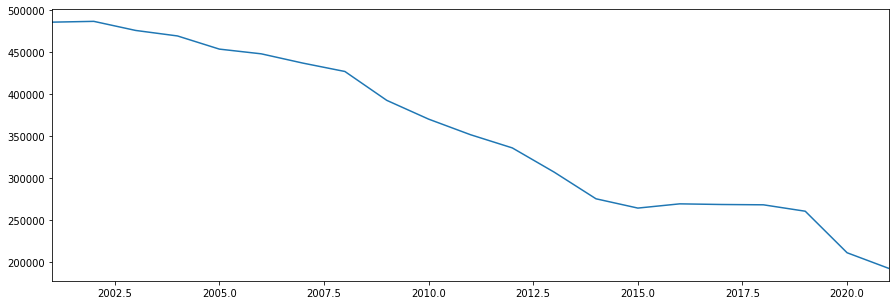

In [36]:
#visualize trends in crimes by year

crimes_df.year.value_counts(dropna=False).sort_index().plot()

In [54]:
#top 10 crimes committed

top10_crimes = crimes_df.primary_type.value_counts().sort_values(ascending=False)[:10]
top10_crimes

THEFT                  1568761
BATTERY                1367605
CRIMINAL DAMAGE         850151
NARCOTICS               739952
ASSAULT                 479171
OTHER OFFENSE           463490
BURGLARY                414121
MOTOR VEHICLE THEFT     344327
DECEPTIVE PRACTICE      321039
ROBBERY                 280101
Name: primary_type, dtype: int64

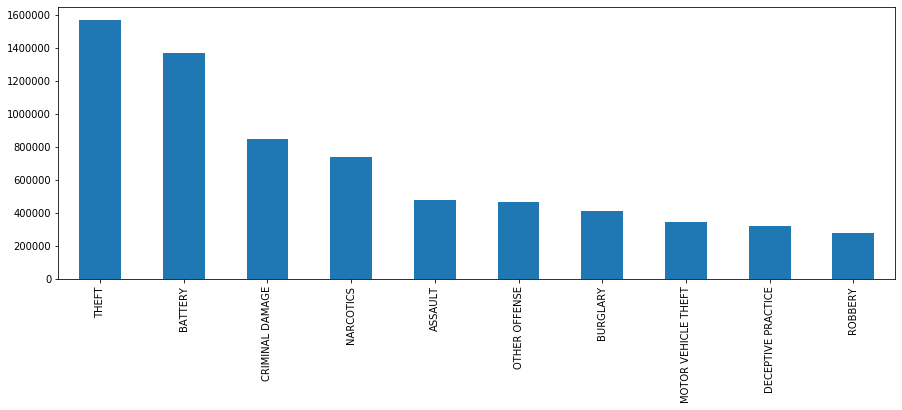

In [56]:
top10_crimes.plot(kind='bar')